In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the training and testing datasets
train_data = pd.read_csv('/content/SalaryData_Train.csv')
test_data = pd.read_csv('/content/SalaryData_Test.csv')




In [3]:
# Display the first few rows of the training dataset
print(train_data.head())




   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [4]:


# Summary statistics of the training dataset
print(train_data.describe())



                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


In [5]:

# Check for any missing values in the training dataset
print(train_data.isnull().sum())


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


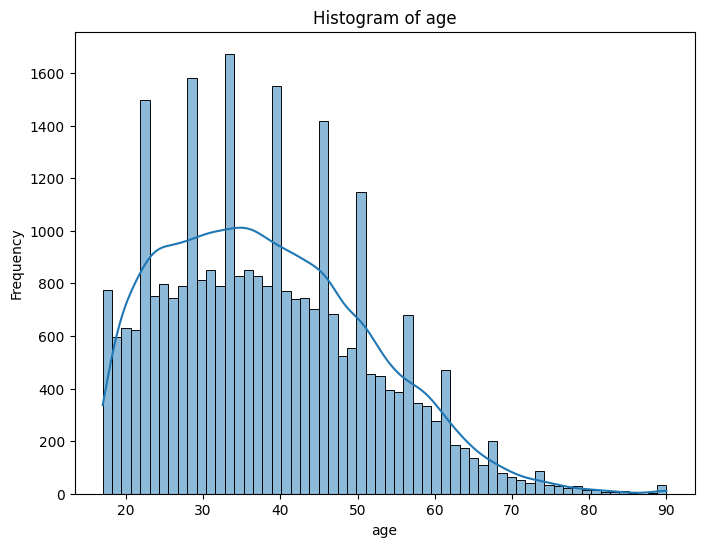

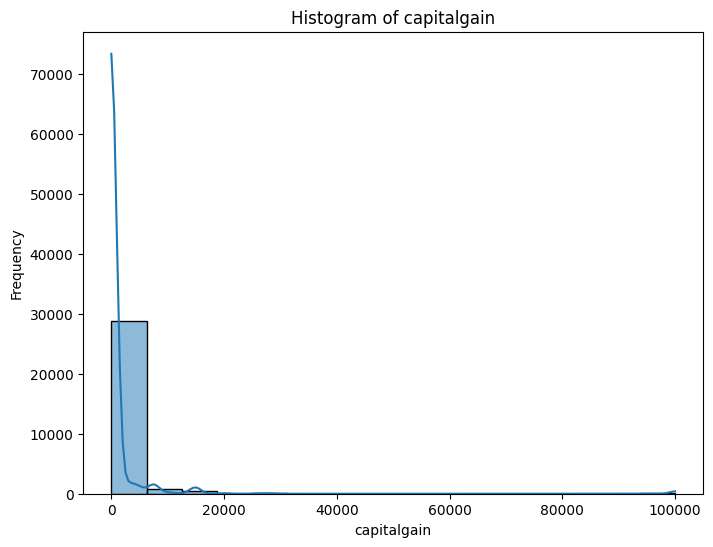

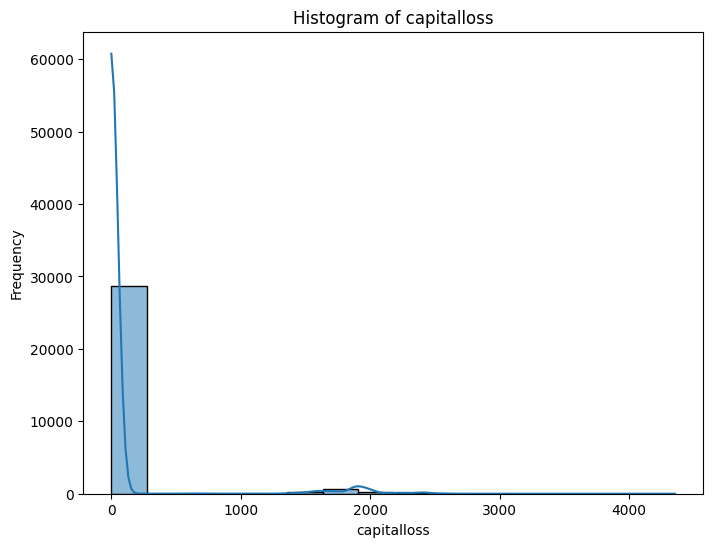

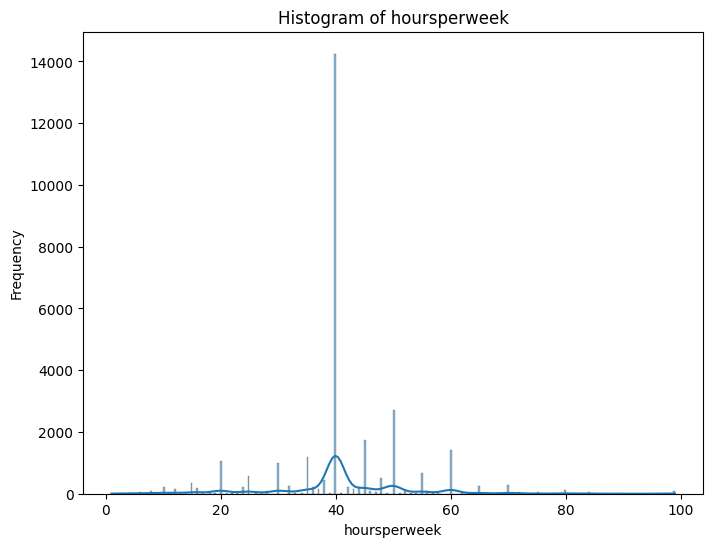

In [6]:
# Histogram for numerical features
numerical_features = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

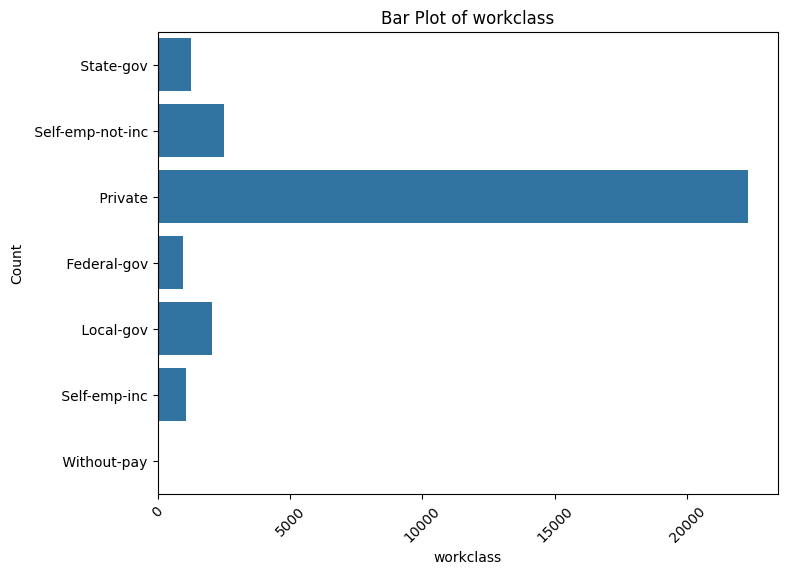

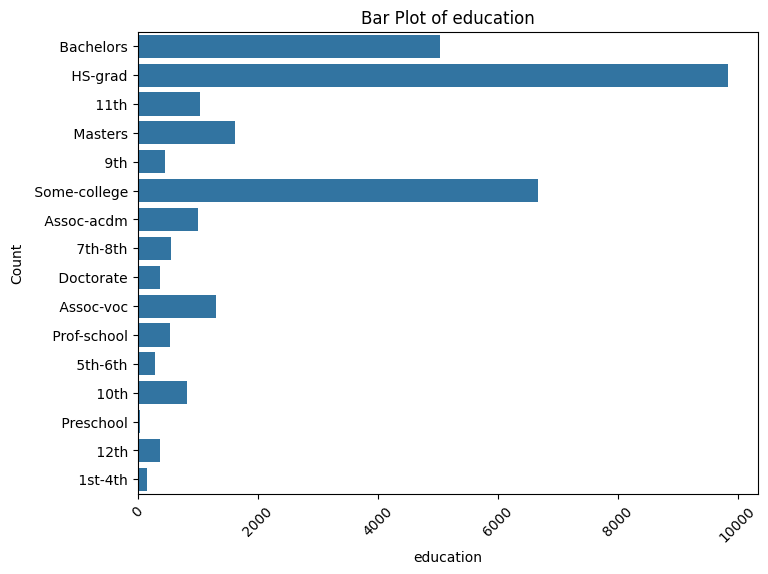

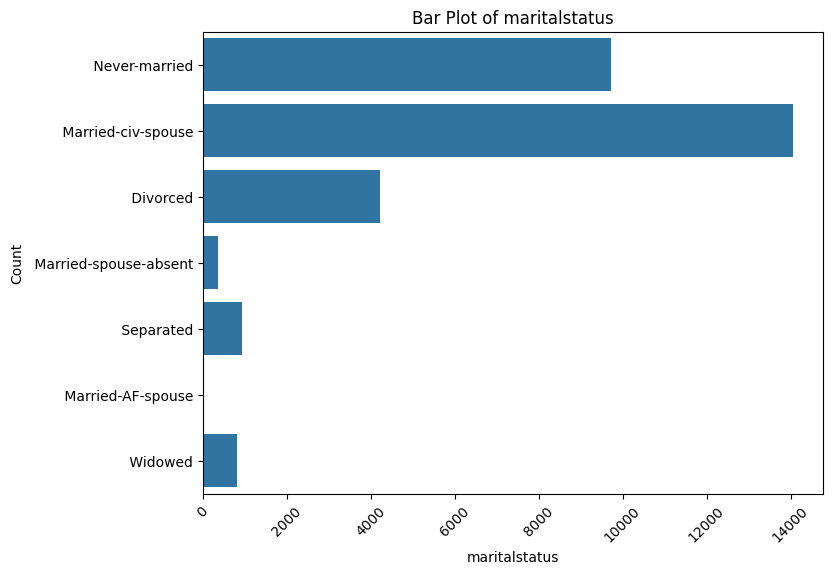

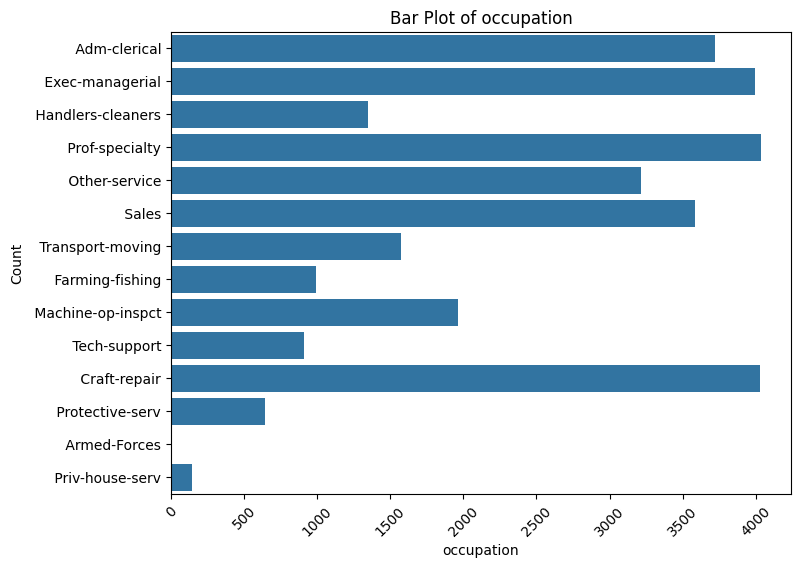

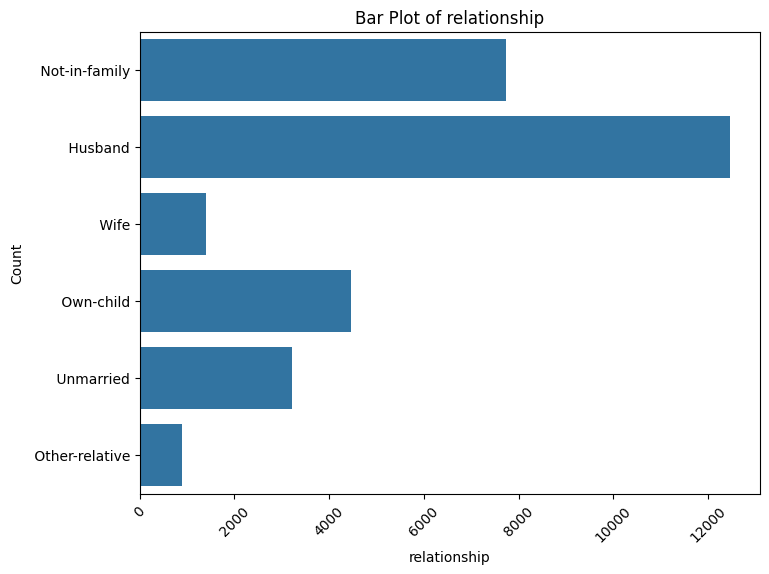

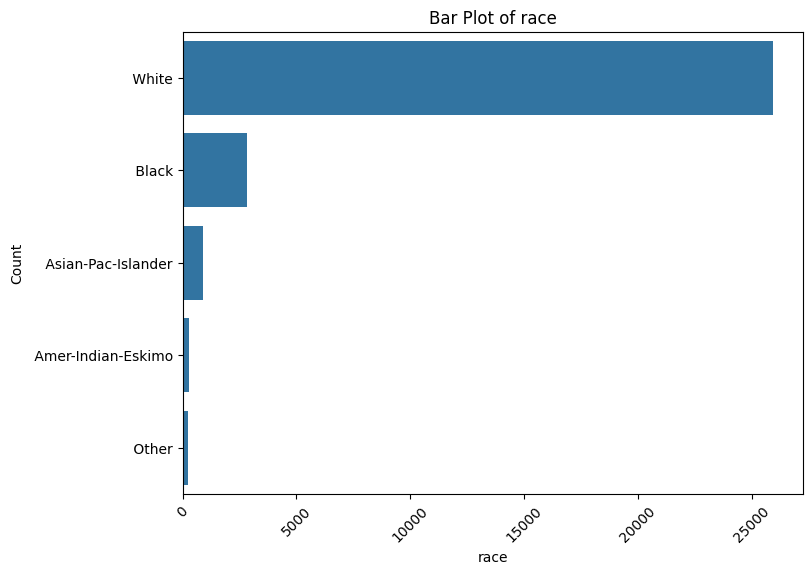

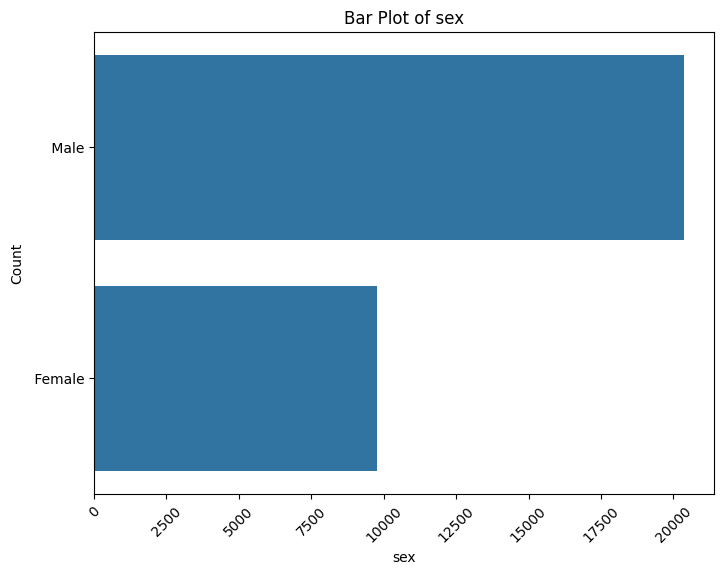

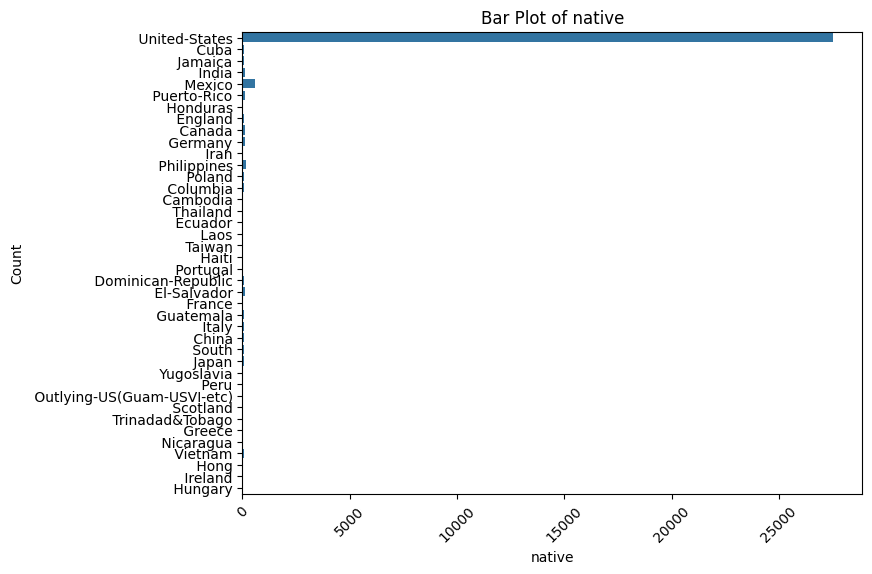

In [7]:
# Bar plot for categorical features
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(train_data[feature])
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

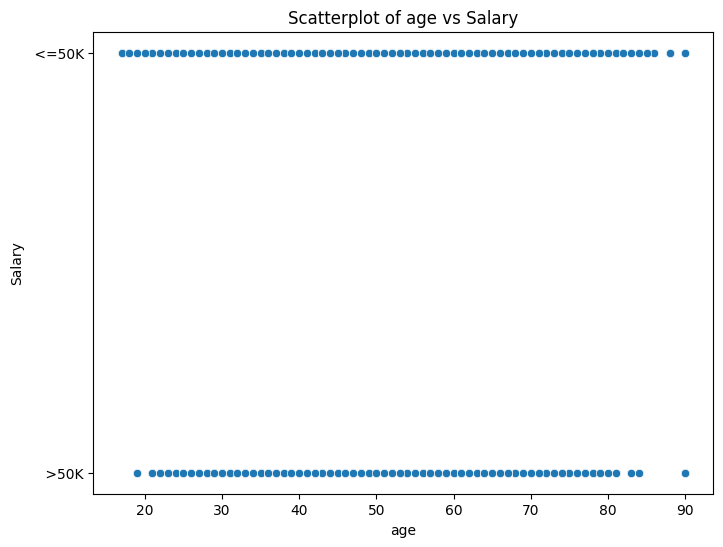

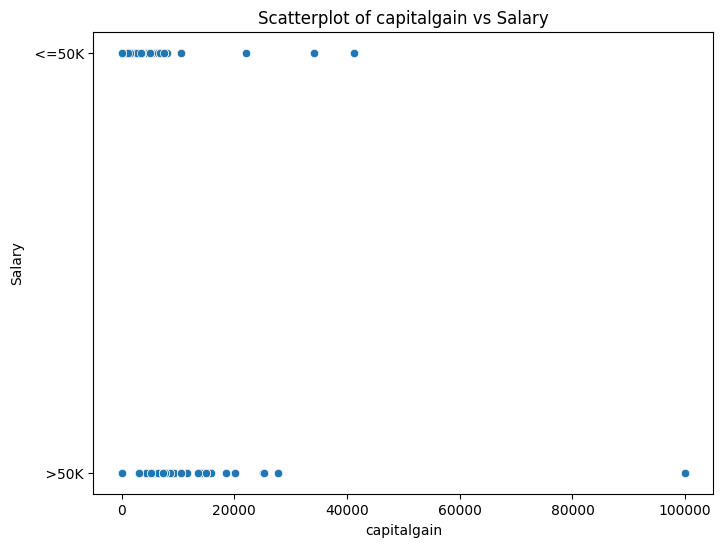

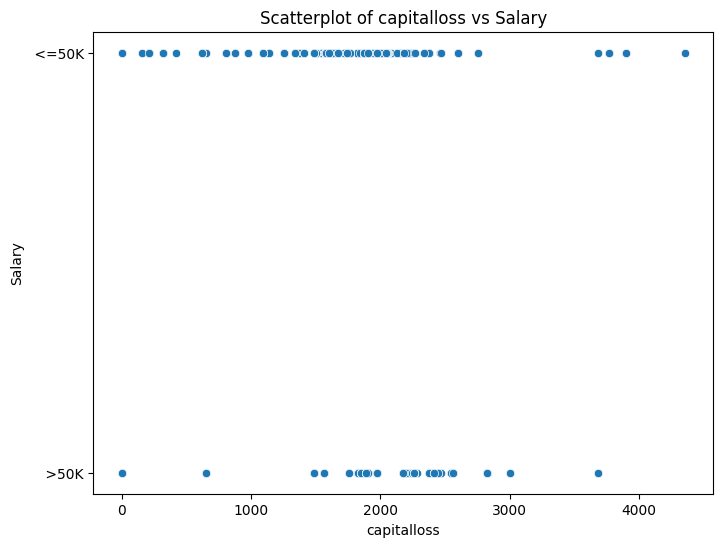

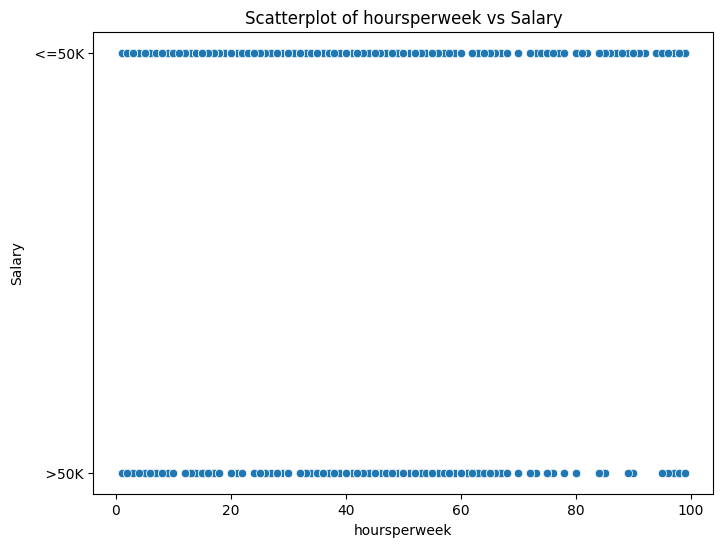

In [10]:
# Scatterplot between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_data[feature], y=train_data['Salary'])
    plt.title(f'Scatterplot of {feature} vs Salary')
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.show()

<Figure size 1000x800 with 0 Axes>

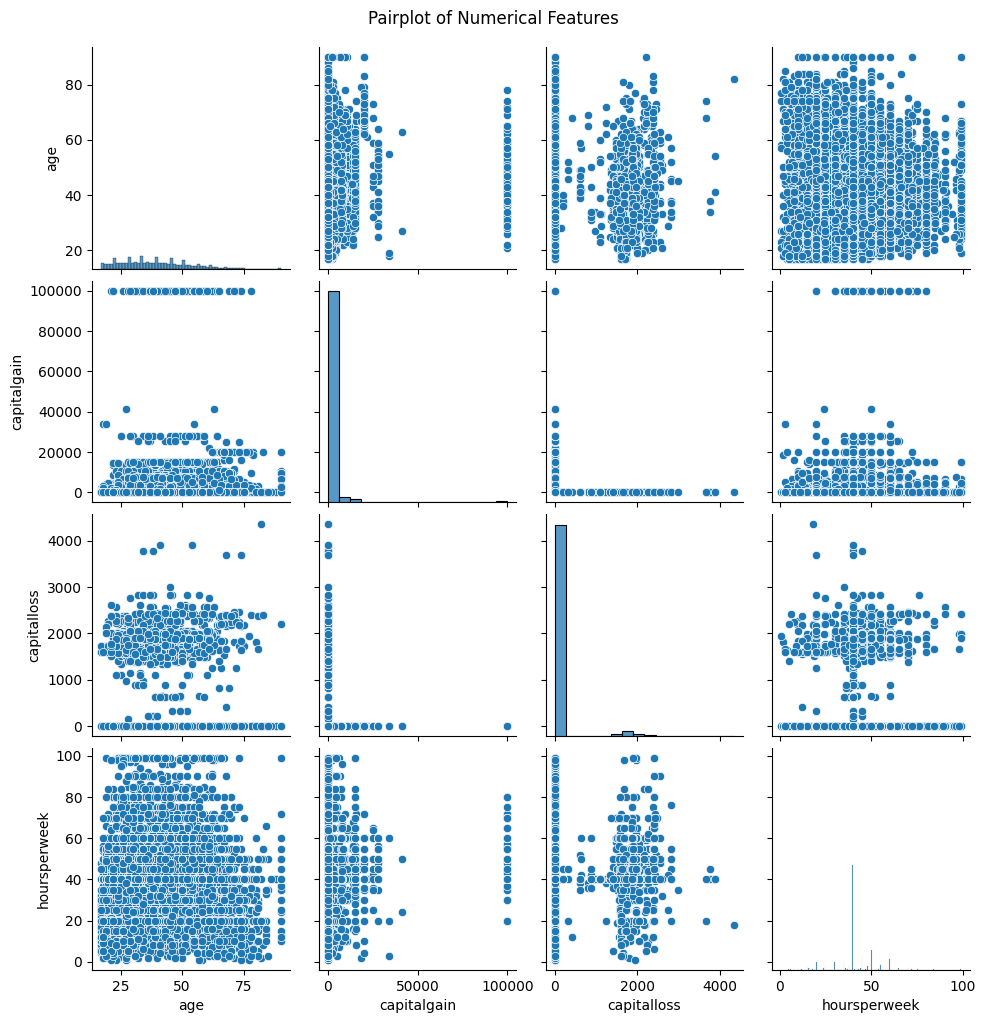

In [11]:
# Pairplot for numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(train_data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Separate features (X) and target variable (y) for both training and testing datasets
X_train = train_data.drop(columns=['Salary'])
y_train = train_data['Salary']
X_test = test_data.drop(columns=['Salary'])
y_test = test_data['Salary']


In [ ]:
X_test.head()

In [ ]:
X_test[X_test.columns[0]].unique()

In [ ]:
X_train[X_train.columns[0]].unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(pd.concat([X_train, X_test]))

In [ ]:
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_encoded, y_train)


In [ ]:
# Evaluate the model on the testing data
accuracy = nb_classifier.score(X_test_encoded, y_test)
print("Accuracy of the Naive Bayes classifier:", accuracy)


In [ ]:
# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_encoded)

# Display the predicted classes
print("Predicted classes for the testing data:")
print(y_pred)
